In [1]:
# configuramos matplotlib para que los plots puedan ser guardados en background
import matplotlib
matplotlib.use("Agg")
# habilitamos que se puedan mostrar los graficos en el notebook
import matplotlib.pyplot as plt
%matplotlib notebook

# Importamos los paquetes necesarios
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from pyimagesearch.lenet import LeNet
from imutils import paths
import numpy as np
import argparse
import random
import cv2
import os

Using TensorFlow backend.


In [2]:
# Inicializamos algunas variables que usaremos para cargar/guardar 
# los archivos
dataset = 'images'
model_file = 'meme_not_meme.model'
plot_file = 'plot.png'

In [3]:
# Inicializamos el número de epocas para entrenar, la tasa de entrenamiento
# y el batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [4]:
# Inicializamos los datos y labels
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [5]:
# Guardamos el path de las imagenes y lo aleatorizamos
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)

In [6]:
# Recorremos el path de imágenes
for imagePath in imagePaths:
	# cargamos las imágenes, preprocesamos y las almacenamos
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)

	# Obtenemos el label de la clase segun el nombre del path
	label = imagePath.split(os.path.sep)[-2]
	label = 1 if label == "meme" else 0
	labels.append(label)

In [7]:
# Estandarizamos los pixeles para que esten en el rango [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [8]:
# dividimos la data en training y testing. 75% para entrenar
# y el otro 25% para pruebas
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [9]:
# convertimos los labels de enteros a vectores
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [10]:
# Construimos el generador de imagenes para aumentar los datos
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [11]:
# Inicializamos el modelo
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [12]:
# Entrenamiento de la red
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/25
15/15 [==============================] - 1s 39ms/step - loss: 0.7213 - accuracy: 0.5118 - val_loss: 0.6465 - val_accuracy: 0.5509
Epoch 2/25
15/15 [==============================] - 0s 28ms/step - loss: 0.5650 - accuracy: 0.6146 - val_loss: 0.6130 - val_accuracy: 0.6108
Epoch 3/25
15/15 [==============================] - 0s 28ms/step - loss: 0.5392 - accuracy: 0.7131 - val_loss: 0.8383 - val_accuracy: 0.6826
Epoch 4/25
15/15 [==============================] - 0s 30ms/step - loss: 0.4808 - accuracy: 0.7437 - val_loss: 0.9539 - val_accuracy: 0.6228
Epoch 5/25
15/15 [==============================] - 0s 28ms/step - loss: 0.4042 - accuracy: 0.8106 - val_loss: 0.5892 - val_accuracy: 0.7665
Epoch 6/25
15/15 [==============================] - 0s 30ms/step - loss: 0.4275 - accuracy: 0.8009 - val_loss: 0.3649 - val_accuracy: 0.8563
Epoch 7/25
15/15 [==============================] - 0s 33ms/step - loss: 0.4227 - accuracy: 0.8137 - val_loss: 0.7115 - val_acc

In [13]:
# Se guarda el modelo en memoria
print("[INFO] serializing network...")
model.save(model_file)

[INFO] serializing network...


<IPython.core.display.Javascript object>


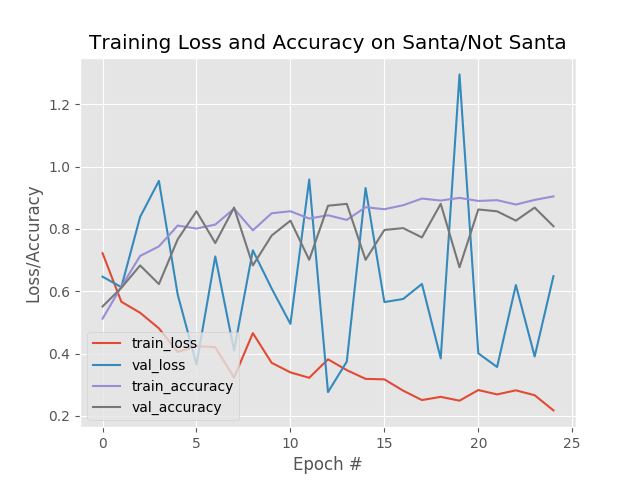

In [14]:
# plot de loss training y accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Santa/Not Santa")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(plot_file)
plt.show()

<IPython.core.display.Javascript object>


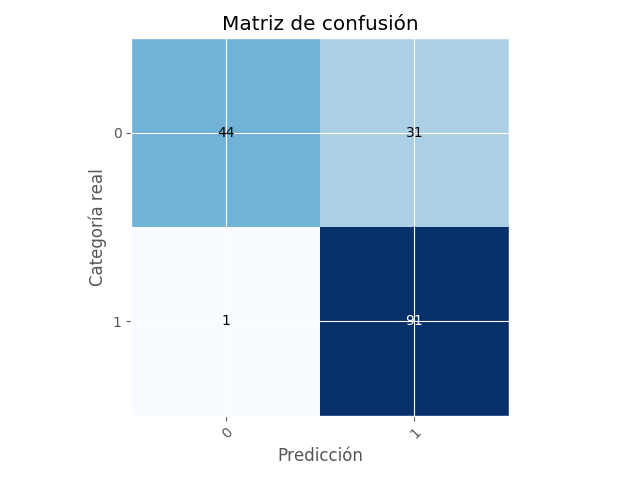

In [15]:
# importamos py de matriz de confusion
from matriz_confusion import graficar_matriz_de_confusion

# graficamos en base a los resultados obtenidos vs los esperados
y_pred = model.predict_classes(testX)
y_ref = np.argmax(testY,axis=1)
etiquetas = ['0','1']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)